In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob


In [149]:
!ls || dir

 Volume in drive D is Data
 Volume Serial Number is 688F-2CBE

 Directory of D:\Competitions\Kaggle - humpback_whale_identification

20-Jan-19  03:22 PM    <DIR>          .
20-Jan-19  03:22 PM    <DIR>          ..
19-Jan-19  04:05 PM    <DIR>          .ipynb_checkpoints
19-Jan-19  03:09 PM           509,449 sample_submission.csv
19-Jan-19  03:54 PM    <DIR>          test
19-Jan-19  03:18 PM     1,446,610,468 test.zip
19-Jan-19  03:58 PM    <DIR>          train
19-Jan-19  03:09 PM           608,673 train.csv
19-Jan-19  03:50 PM     4,462,404,155 train.zip
20-Jan-19  03:22 PM           189,448 WhaleReader.ipynb
               5 File(s)  5,910,322,193 bytes
               5 Dir(s)  772,446,576,640 bytes free


'ls' is not recognized as an internal or external command,
operable program or batch file.


In [161]:
# Read images paths
input_images = glob("train/*")

input_images_csv = pd.read_csv("train.csv")
input_images_csv.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [157]:
# https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas
print("Extract dataframe details: ")
print(input_images_csv.loc[input_images_csv['Image'] == "a08e781e7.jpg"]['Image'])

print(input_images_csv.loc[input_images_csv['Image'] == "a08e781e7.jpg"]['Image'].values[0])

Extract dataframe details: 
15940    a08e781e7.jpg
Name: Image, dtype: object
a08e781e7.jpg


w_23a388d have 73 images @ train/


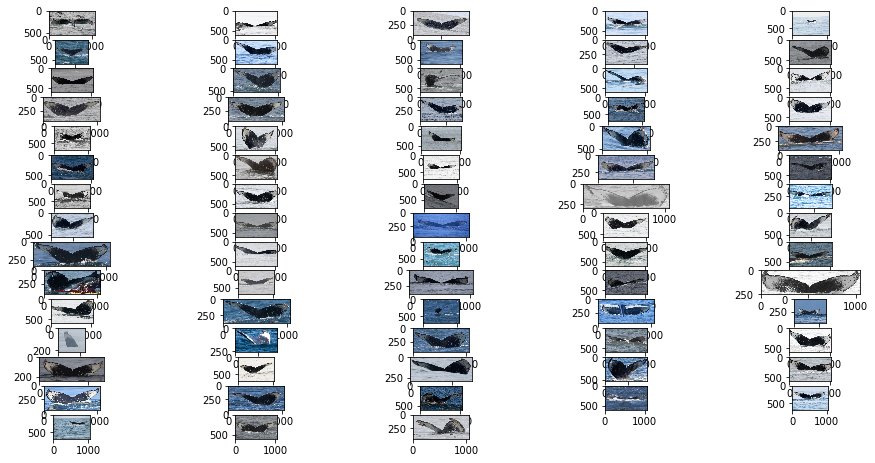

In [219]:

def displayImagesById(images_df, selectedId, path="train/"):
    selectedImages = input_images_csv.loc[input_images_csv['Id'] == selectedId]
    if(len(selectedImages) > 100):
        print("Please select a Id with <=100 images. For '"+ selectedId+ "', there are", len(selectedId), "images.")
        return
    print(selectedId, "have", len(selectedImages), "images @", path)
    i=0
    plt.figure(figsize=(16,10))
    for index, image_row in selectedImages.iterrows():
        img = plt.imread(path+image_row['Image'])
        plt.subplot(len(selectedImages)//4+1,5,i+1)
        plt.imshow(img)
        i+=1
    plt.show()
# displayImagesById(input_images_csv, "w_ffa542b")
# displayImagesById(input_images_csv, "new_whale")
displayImagesById(input_images_csv, "w_23a388d")


In [147]:
def diplayRandomImages(images_path, noOfImages=5, imageInSingleRow = 5):
    total_images = len(images_path)
    if(total_images < noOfImages):
        noOfImages = total_images
    plt.figure(figsize=(16,10))
    img_counts = 0
    # for i in np.linspace(0, total_images//noOfImages, num=noOfImages):
    for i in np.random.randint(0, total_images-1, noOfImages):
        img = plt.imread(images_path[int(i)])
        plt.subplot(noOfImages//imageInSingleRow+1, imageInSingleRow, img_counts+1)
        imageName = images_path[int(i)].split("\\")[1]
        imageDetails = input_images_csv.loc[input_images_csv['Image'] == imageName ]
        # print(imageDetails['Image'] )
        plt.title( imageDetails['Image'].values[0] + " (" + imageDetails['Id'].values[0] + ")" )
        plt.imshow(img)
        img_counts +=1
    plt.show()

Some Input Images from training set:


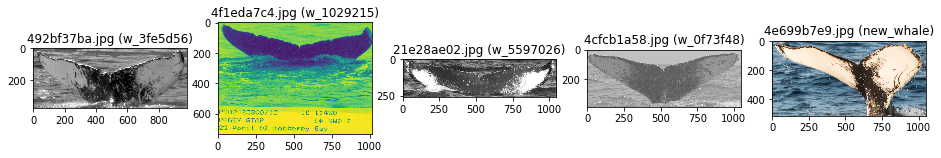

In [148]:
print("Some Input Images from training set:")
diplayRandomImages(input_images, 5)

In [186]:
print(input_images_csv.shape)
input_images_csv.loc[input_images_csv.duplicated(subset=['Id'])].shape
a = input_images_csv.loc[np.equal(True, input_images_csv.duplicated(subset=['Id'], keep=False) )]
a = a.sort_values(by="Id", ascending=False)
a = a[~(a['Id'] == "new_whale")]
print(a)
# input_images_csv.duplicated(subset=['Id'], keep=False)

(25361, 2)
               Image         Id
7899   4f9e431aa.jpg  w_ffa542b
20368  cd3a073a2.jpg  w_ffa542b
13772  8abea550e.jpg  w_ffa542b
7031   4745ff776.jpg  w_ff5fc91
21237  d5ce140aa.jpg  w_ff5fc91
5447   37b48ea14.jpg  w_ff2157c
20472  ce31e6e6a.jpg  w_ff2157c
3480   23cae24e7.jpg  w_ff2157c
6623   436f396cd.jpg  w_ff2157c
3152   20642425b.jpg  w_fec5547
1580   0fd6ca5c6.jpg  w_fec5547
14242  8f6d1cf79.jpg  w_fec5547
10816  6dc294615.jpg  w_fec5547
24111  f2d530841.jpg  w_fec331a
17166  ac6e3cd31.jpg  w_fec331a
10371  68d3b0bc4.jpg  w_fec331a
20058  c9ed8c53b.jpg  w_fec331a
561    0576b4452.jpg  w_fec331a
10596  6b674012a.jpg  w_fec331a
22283  e01e495c7.jpg  w_fec331a
7478   4bd09e7eb.jpg  w_fec331a
21989  dd2aaf7a4.jpg  w_fec331a
3967   2898bb378.jpg  w_fec331a
9966   64e762ce4.jpg  w_fec331a
17546  afffc59e8.jpg  w_fe94155
18825  bdab6a183.jpg  w_fe94155
11505  74e26e58e.jpg  w_fe881f2
16440  a57521367.jpg  w_fe881f2
1574   0fcb254ea.jpg  w_fe881f2
15833  9f8035a58.jpg  w_fe881

In [174]:
a = [True, False]
np.equal(False, a)

array([False,  True])